<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Load-the-iris-dataset" data-toc-modified-id="Load-the-iris-dataset-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Load the iris dataset</a></span><ul class="toc-item"><li><span><a href="#Requirements-for-scikit-learn" data-toc-modified-id="Requirements-for-scikit-learn-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Requirements for <code>scikit-learn</code></a></span></li></ul></li><li><span><a href="#Supervised-ML---Logistic-Regression-Classification" data-toc-modified-id="Supervised-ML---Logistic-Regression-Classification-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Supervised ML - Logistic Regression Classification</a></span><ul class="toc-item"><li><span><a href="#Import-the-class" data-toc-modified-id="Import-the-class-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Import the class</a></span></li><li><span><a href="#Initiate-the-estimator" data-toc-modified-id="Initiate-the-estimator-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Initiate the estimator</a></span></li><li><span><a href="#Fit-the-model-with-the-data" data-toc-modified-id="Fit-the-model-with-the-data-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Fit the model with the data</a></span></li><li><span><a href="#Predict-the-response-for-a-new-observation" data-toc-modified-id="Predict-the-response-for-a-new-observation-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Predict the response for a new observation</a></span></li><li><span><a href="#Model-tuning" data-toc-modified-id="Model-tuning-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>Model tuning</a></span></li><li><span><a href="#Plot-the-decision-boundaries-for-each-class" data-toc-modified-id="Plot-the-decision-boundaries-for-each-class-2.6"><span class="toc-item-num">2.6&nbsp;&nbsp;</span>Plot the decision boundaries for each class</a></span></li></ul></li></ul></div>

[`scikit-learn`](https://scikit-learn.org/stable/) is a Python library widely used for machine learning. It's built on `numpy`, `scipy`, and `matplotlib`.

This is a practical introduction to `scikit-learn`. This is NOT an introduction to machine learning concepts. Here I am demonstrating the practical aspectes (== code) of machine learning algorithms.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns
import sklearn

print('scikit-learn version: ', sklearn.__version__)

scikit-learn version:  0.24.0


In [2]:
from sklearn import datasets # get datasets that are builtin 

As in notebook [0_SupML_KNeighborClassifier](./0_SupML_KNeighborClassifier.ipynb), we'll continue to work with the [iris dataset](https://archive.ics.uci.edu/ml/datasets/iris).

The *famous* iris dataset comprises 50 samples of 3 iris species (*Iris setosa*, *I. versicolour*, *I. verginica*). Of all these 150 flower samples, sepal length and width, and petal length and width were collected. Measurements were in centimeters. This dataset is famous because it's fairly simplistic and the prediction is easy.

**The goal** is to practice `scikit-learn` code for supervised and unsupervised machine learning.

**Exercise on supervised machine learning.** The goal is to distinguish each species based on the sepal and petal attributes. This is an example of supervised machine learning because i) the data is labeled, and ii) we are trying to predict relationship of the data (sepal/petal length and width) to an outcome (i.e., species). This is a **classification** problem because the response being predicted is categorial. 

The algorithm is called [**Logistic Regression**](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html#sklearn.linear_model.LogisticRegression), also known as logit and MaxEnt. Don't get confused by its name. Logistic Regression is a linear model for **classification**. Details of the model can be found [here](https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression).

Let's go!

# Load the iris dataset

In [3]:
from sklearn.datasets import load_iris

In [4]:
iris = load_iris()
type(iris) # scikit-learn specific data object

sklearn.utils.Bunch

It's important to know some terms and data organization because they are pretty much convention.

- each row of the data is a sample (aka, observation, example, instance, record)
- each column is a feature (aka, predictor, attribute, independent variable, input, regressor, covariate)
- each value we are predicting is a response (aka, target, outcome, label, dependent variable)

In [5]:
# find out the attribues of these data:
dir(iris)

['DESCR',
 'data',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [6]:
# iris.data # data is an array
# iris.feature_names # features
# iris.target # 0,1,2 for species, response/label
iris.target_names # species names in order 0,1,2

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

## Requirements for `scikit-learn`

Features and responses must be:
- in separate objects
- be numeric
- be stored in `numpy` arrays
- have one response corresponding to each observation, specific shape

Let's check:

In [7]:
iris.data[:10,:]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1]])

In [8]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [9]:
print(type(iris.data))
print(type(iris.target))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [10]:
print(iris.data.shape)
print(iris.target.shape)

(150, 4)
(150,)


Check, check, check, check!

# Supervised ML - Logistic Regression Classification

As convention, observations (data) should be stored in a variable called `X` (capitalized, represents a matrix), and the response should be stored in a variable called `y` (lowercase, represents a vector).

Using convention is highly recommended because not only keeps everything standardized and organized, but also makes it easier to collaborate with others. Another advantage is that it's easier and faster to test code you find online if you stick to the conventions. 

An interesting detail is that `scikit-learn`'s interface of ML models has a common pattern across different models, which makes it easier to recycle code ;)

Instead of using all four features, let's use two so we can plot a countour plot later. Let's use sepal length and width.

In [5]:
X = iris.data[:,:2]
y = iris.target

## Import the class

In [6]:
# import the class
from sklearn.linear_model import LogisticRegression

## Initiate the estimator

 `scikit-learn` refers to its models as estimators because their role is to estimate stuff.
 
To use one of their estimators, we need to create an instance of the estimator as an object. I think of an instance like a copy of the estimator that you can use.

Import things to think when instantiating:
- the name of the object doesn't matter, but it's recommended to use a name that reflects the model it represents
    - in this case, we could use `logreg` (estimator name)
- specify hyperparameters (or tunning parameter) during this step
- there are other parameters that can be not specified, and thus using their default value

In [7]:
?LogisticRegression

In [8]:
# instantiate the estimator
logreg = LogisticRegression(C = 1e5) # default C == 1.0, and must be positive

## Fit the model with the data

This is model training. The model learns the data between the features and the response.

Occurs in place

In [9]:
logreg.fit(X, y)

LogisticRegression(C=100000.0)

## Predict the response for a new observation

New samples are called out-of-sample data. We use the model we trained above to predict new responses.

In [10]:
y_pred = logreg.predict(X)

# how many were generated
print(len(y_pred))

150


## Model tuning

Tuning hyperparamenters is when you test different paramets in the model, like a new value for K (n_neighbors)

In [11]:
logreg = LogisticRegression(C = 1e3)
logreg.fit(X, y)

LogisticRegression(C=1000.0)

## Plot the decision boundaries for each class

We can plot the boundaries for each response based on the relationship of two features, e.g., sepal length and petal length.

For that, we'll need to redo the model to account for those two features we are interested in. We can't plot a 4D countour plot... 

In [13]:
# boundaries
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1  # sepal length
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1  # petal length

# step size in the np.meshgrid
h = 0.02

# meshgrid returns a matrix from vector coordinates
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# np.c_ == Translates slice objects to concatenation along the second axis
# ravel() == Return a contiguous flattened array
Z = logreg.predict(np.c_[xx.ravel(), yy.ravel()])

Z = Z.reshape(xx.shape)

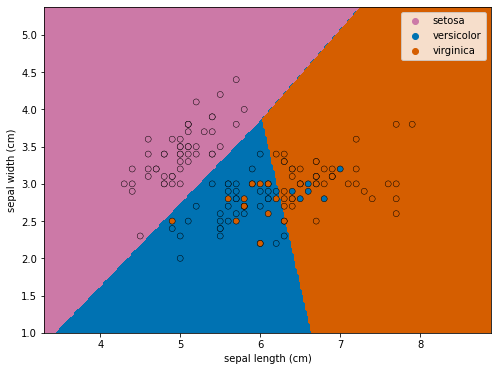

In [14]:
# Create color maps
# inspiration for the palettes == https://www.color-hex.com/color-palettes/
cmap = ListedColormap(['#cc79a7', '#0072b2', '#d55e00']) # this is for the coutour
cmap_ = ['#cc79a7', '#0072b2', '#d55e00'] # this is for the scatter

plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, cmap=cmap)

# Plot also the training points
sns.scatterplot(x=X[:, 0],
                y=X[:, 1],
                hue=iris.target_names[y],
                palette=cmap_,
                alpha=1.0,
                edgecolor="black")
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])

plt.show()